In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
# Import the data, taken from https://github.com/mubaris/friendly-fortnight
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [8]:
# Put the columns in the df into two np arrays
f1 = data.V1.values
f2 = data.V2.values

In [16]:
# Put the two np arrays into another array of arrays
X = np.array(list(zip(f1, f2)))
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ..., 
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

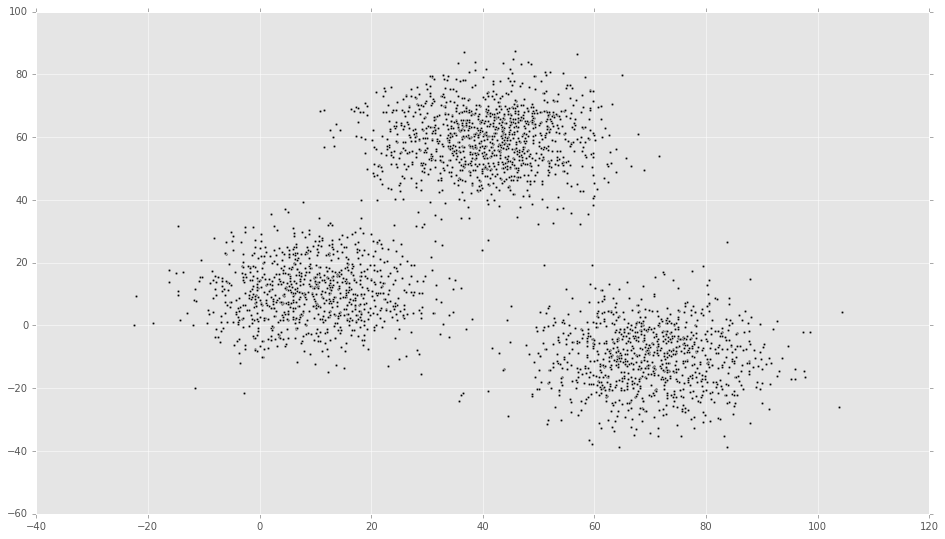

In [17]:
# Draw a scatter plot of all data points
plt.scatter(f1, f2, c="black", s=7)

In [18]:
# Define a Euclidean distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of cluster
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

In [23]:
C_x

array([15, 49, 76])

In [24]:
C_y

array([ 3, 74, 56])

In [25]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 15.   3.]
 [ 49.  74.]
 [ 76.  56.]]


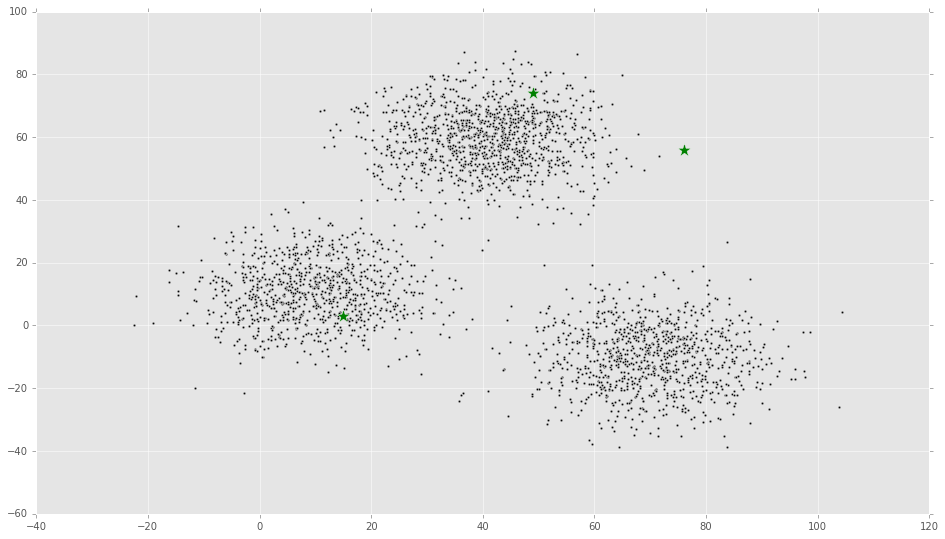

In [26]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

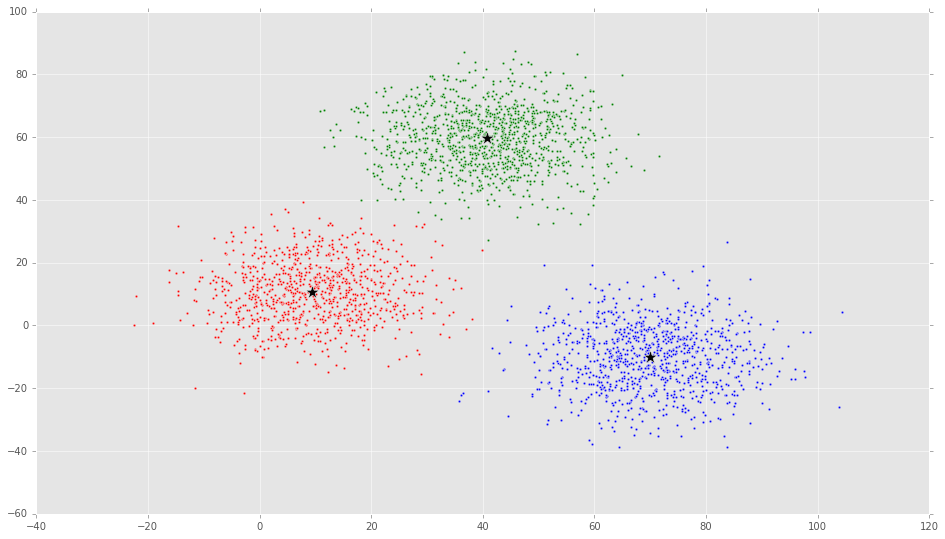

In [29]:
# to store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluser labels(0, 1, 2)
clusters = np.zeros(len(X))
# Error function - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

#### The scikit-learn approach

In [30]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print(C) # from scratch
print(centroids) # from sklearn

[[  9.47804546  10.68605232]
 [ 40.68362808  59.71589279]
 [ 69.92418671 -10.1196413 ]]
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


#### Example 2 - generating a new datset using make_blobs function

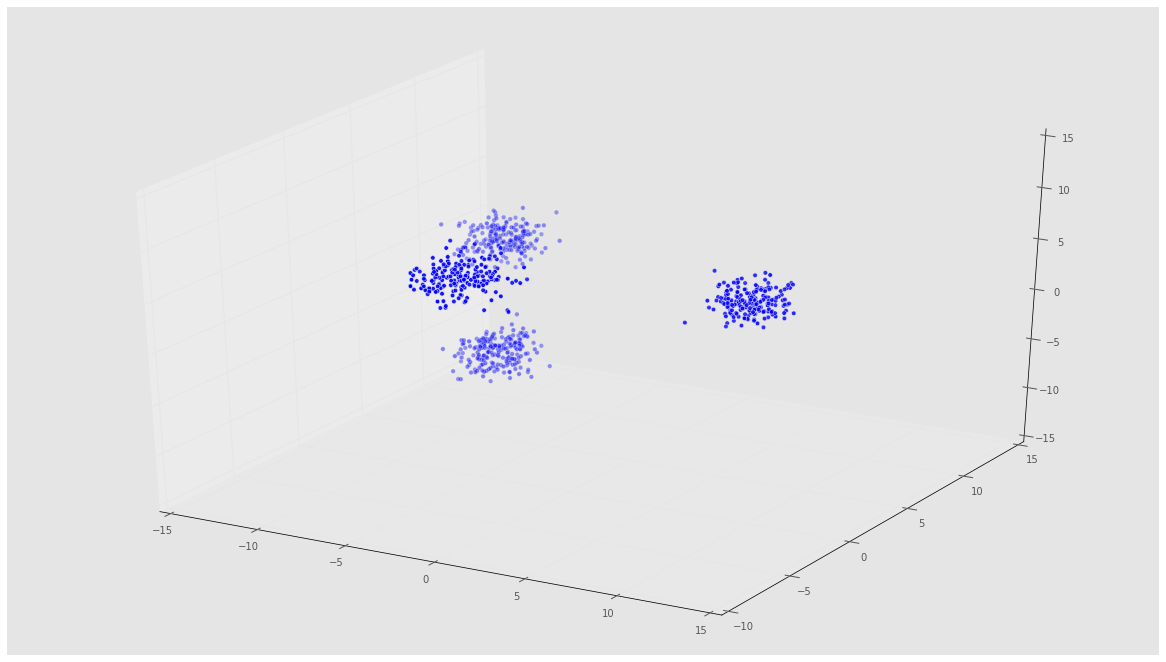

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

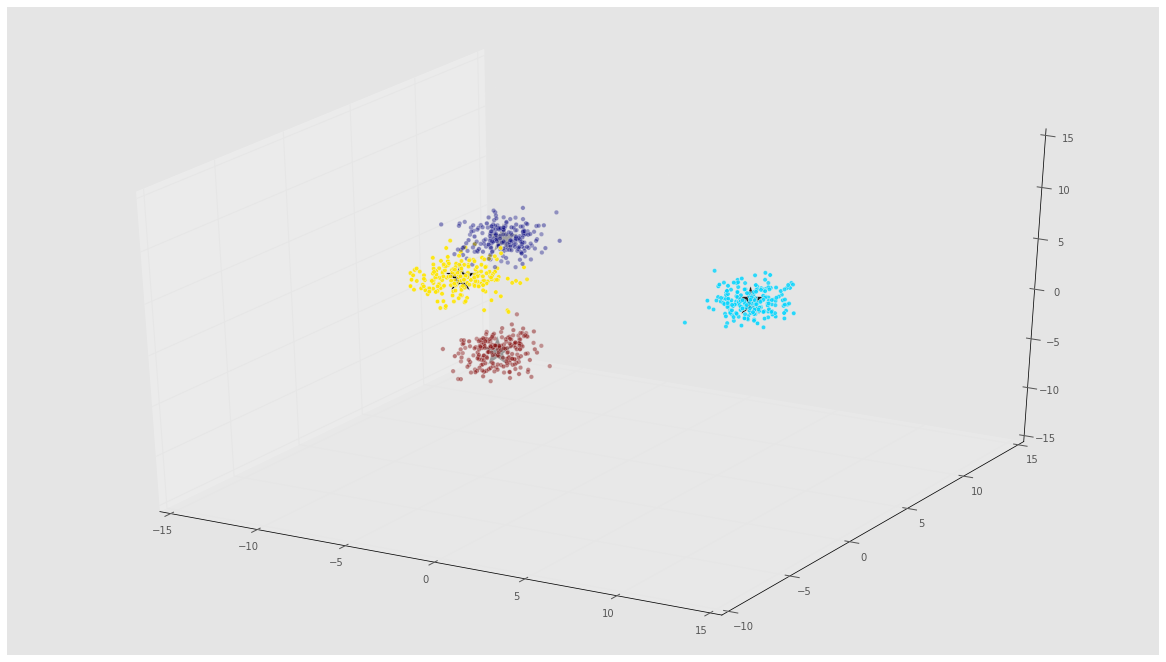

In [32]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)